### An implementation of a simple neural network

#### Data Loading and Network Setup

In [87]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from data_loader import MnistDataloader
from IPython.display import display, clear_output

print("Loading dataset...")
mnist_dataloader = MnistDataloader()
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
x_train_images = np.array(x_train[:1000]) # 60000 x 28 x 28
y_train = np.array(y_train[:1000]) # 60000
x_test_images = np.array(x_test[:1000])   # 10000 x 28 x 28
y_test = np.array(y_test[:1000])   # 10000

# Convert tensor to lower dimension and normalize
print("Reshaping dataset...")
x_train = x_train_images.reshape(x_train_images.shape[0], -1) # 60000 x 784
x_train = x_train / 255.0
x_test = x_test_images.reshape(x_test_images.shape[0], -1)    # 10000 x 784
x_test = x_test / 255.0

# Apply one-hot-coding to labels
y_train_hot = np.zeros((y_train.size, 10))
y_train_hot[np.arange(y_train.size), y_train] = 1   # 60000 x 10
y_test_hot = np.zeros((y_test.size, 10))
y_test_hot[np.arange(y_test.size), y_test] = 1      # 10000 x 10

# Construct network
print("Creating network...")
layer_1 = 128
layer_2 = 10
weights_1 = np.random.randn(x_train.shape[1], layer_1) * 0.01  # 784 x 128
biases_1 = np.zeros(layer_1)                                   # 128
weights_2 = np.random.randn(layer_1, layer_2) * 0.01    # 128 x 10
biases_2 = np.zeros(layer_2)
print("Done")

Loading dataset...
Reshaping dataset...
Creating network...
Done


#### Network Training

'Training 0 of 1000 done.'

[10.869594654497963, 0.0009940091510935428, 2.3426937119422626, 0.0018023853944398463, 3.025133996500161, 0.46043724025210925, 0.011539728457718034, 1.2993098604047119e-05, 0.004473503741710627, 5.766476776789808, 0.000667803203234326, 0.005519168280094926, 6.941085075722609e-05, 1.5954859982205924e-05, 0.00030252872949330765, 9.565945636959262e-09, 3.6210596270613706, 0.1293953267598981, 0.2936916387398649, 3.1697433532754475, 3.981940387292345, 0.02024955305421558, 0.2014202691245335, 0.0009599649796927561, 4.34081638058636, 0.28280813714878106, 3.33418462411228, 8.257595197301949e-09, 14.161593957237177, 1.2063682242276927, 0.08648655947637218, 0.00011127349681067176, 0.005299507380344529, 7.2277443359751015, 2.5066335537538063, 1.470279977042892e-05, 0.0006269588540945502, 0.001164477078346027, 0.004864150174548949, 0.0486112675003175, 0.003254731046552894, 0.5073699596380479, 0.02225409694223896, 0.013199615580140015, 0.032529066615950356, 0.012226028096321348, 0.6388645487064109,

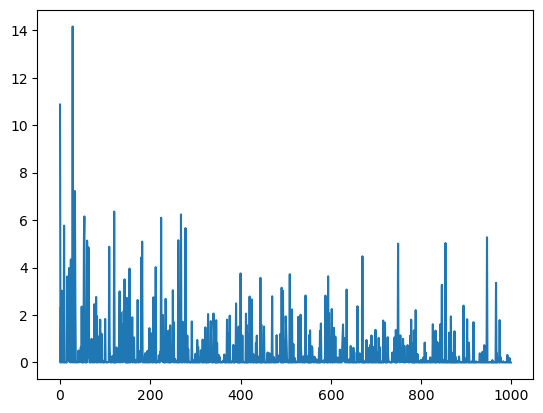

In [95]:
# ReLU activation function
def relu(vector):
    return np.maximum(0, vector)


# Derivative function of ReLU
def relu_derivative(x):
    return (x > 0).astype(float)


# Softmax activation function
def softmax(vector):
    exp_vector = np.exp(vector)
    return exp_vector / np.sum(exp_vector)


# Cross entropy loss function
def ce_loss(output_vector, label_vector):
    return -np.sum(label_vector * np.log(output_vector))

# Run network
learning_rate = 0.01
losses = []
for index in range(x_train.shape[0]):
    if index != 0 and index % 1000 == 0:
        clear_output(wait=True)
        display(f"Training {index} of {x_train.shape[0]} done.")

    # Forward pass
    output_1 = relu(np.dot(x_train[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    losses.append(ce_loss(output_2, y_train_hot[index]))

    # Backward pass
    d_output_2 = output_2 - y_train_hot[index]  # Combined derivative of softmax and ce loss
    d_loss_weights_2 = np.outer(output_1, d_output_2)
    d_output_1 = np.dot(weights_2, d_output_2) * relu_derivative(output_1)
    d_loss_weights_1 = np.outer(x_train[index], d_output_1)

    weights_2 -= learning_rate * d_loss_weights_2
    biases_2 -= learning_rate * d_output_2
    weights_1 -= learning_rate * d_loss_weights_1
    biases_1 -= learning_rate * d_output_1

print(losses)
plt.plot(losses)
print("Done")

#### Test Network

[1.0433619483609851e-05, 0.00271283363103232, 0.0006309222530192151, 0.003390921069603312, 0.005486116462212116, 0.005123029946402824, 0.06185465588677127, 0.9610612563353575, 2.8078429021154503, 0.4184133228662847, 0.18658252614901213, 0.6539844238843221, 0.005623950519390269, 0.0008340389674934704, 0.02184432903239273, 0.807895754618885, 0.5723355818582343, 0.0005682123881878414, 0.8858377262581154, 0.05945693837681981, 0.01552352524556065, 0.2598472819009732, 0.8856936086453383, 0.15536784115294908, 0.16013938843160122, 5.918604695941542e-05, 0.006512169614107377, 0.0011447950957760228, 0.0017158225884124655, 0.017416981919445094, 0.0001891647286775899, 0.059366439130797914, 0.08719532865420361, 0.4184318289380977, 0.0013670502638844133, 8.494243130478835e-07, 0.0003085704298182233, 0.0035113980628377495, 0.021060278939942653, 0.032210519543470685, 0.0087625765967524, 0.0020505318390565646, 0.5952764729973671, 0.00015250191087018395, 1.92930327251438, 1.1654561791247222, 0.073049953

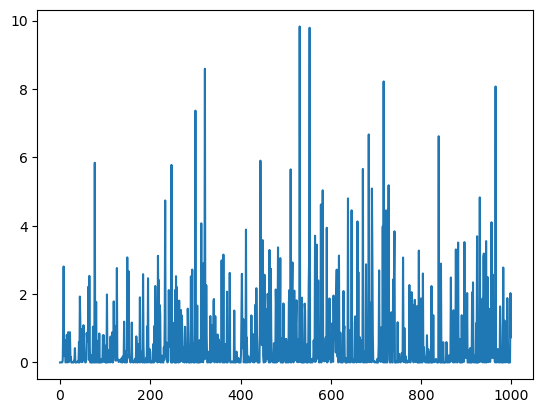

In [96]:
test_outputs = []
test_losses = []
for index in range(x_test.shape[0]):
    output_1 = relu(np.dot(x_test[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    loss = ce_loss(output_2, y_test_hot[index])
    test_outputs.append(output_2)
    test_losses.append(loss)

print(test_losses)
plt.plot(test_losses)

Index of max value: 531
Accuracy: 80.80000000000001 %
Label:  4 - Prediction: 4 -> True


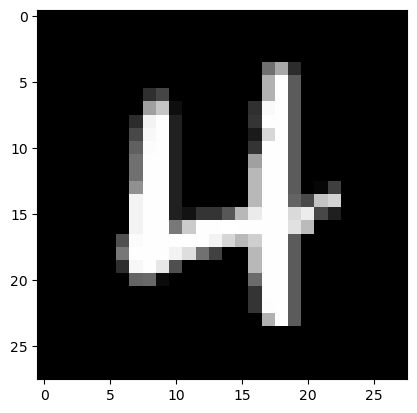

<BarContainer object of 10 artists>

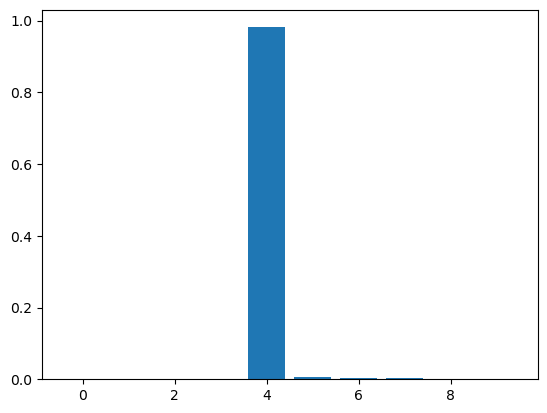

In [111]:
# Print max value index
max_index = test_losses.index(max(test_losses))
print("Index of max value:", max_index)

# Print accuracy
hits = [np.argmax(test_outputs[index]) == y_test[index] for index in range(len(x_test))]
print("Accuracy:", sum(hits) / len(hits) * 100, "%")

# Plotting the bar chart
index = 533
print("Label: ", y_test[index], "- Prediction:", np.argmax(test_outputs[index]), "->", hits[index])
plt.imshow(x_test_images[index], cmap=plt.cm.gray)
plt.show()
plt.bar(range(len(test_outputs[index])), test_outputs[index])
